<a href="https://colab.research.google.com/github/sarite19/ProyectoAnaMatriculados/blob/main/Analisis_Dataset_Matriculados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matriculados Tecnologico de Artes Debora Arango

Fuente de datos: https://www.datos.gov.co/Educaci-n/Matriculados-Tecnologico-de-Artes-Debora-Arango-20/bthp-b7qp/about_data

Es una institución educativa colombiana ubicada en Envigado, Antioquia. Fue fundada en 1978 y lleva el nombre de la reconocida artista Débora Arango.
El Tecnológico de Artes Débora Arango se enfoca en la formación de artistas y técnicos en artes

### Objetivo:
- Reconocer y entender qué tipo de datos vamos a trabajar.
- Realizar limpieza de datos.
- Realizar análisis de las gráficas

Iniciamos importando librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los datos

In [11]:
url = 'https://raw.githubusercontent.com/sarite19/ProyectoAnaMatriculados/main/Matriculados_Tecnologico_de_Artes_2019-2024.csv'
matriculados_db = pd.read_csv(url, sep=';')

Visualización del DataFrame

In [14]:
matriculados_db

,CONSECUTIVO,ANIO _ MATRICULA,PERIODO_ MATRICULA,CODIGO_INSTITUCION,ID_SEXO,MUNICIPIO_ PRO,CODIGO _ PROGRAMA,PROGRAMA,ANIO_NACIMIENTO,PAIS NACIMIENTO,CIUDAD NACIMIENTO,ANIO_ PRIMER CURSO,PERIODO _PRIMER CURSO
0,2017,2021,1,3303,1,5266,54737,TECNICA PROFESIONAL EN ACTUACION PARA LAS PRAC...,12/03/1998 12:00:00 AM,170,5088,2021,1
1,2018,2021,1,3303,1,5266,54737,TECNICA PROFESIONAL EN ACTUACION PARA LAS PRAC...,09/29/1999 12:00:00 AM,170,5001,2019,2
2,2019,2021,1,3303,2,5266,54737,TECNICA PROFESIONAL EN ACTUACION PARA LAS PRAC...,11/08/2000 12:00:00 AM,170,5656,2020,1
3,2020,2021,1,3303,2,5266,54737,TECNICA PROFESIONAL EN ACTUACION PARA LAS PRAC...,08/10/2002 12:00:00 AM,170,5001,2020,1
4,2021,2021,1,3303,2,5266,54737,TECNICA PROFESIONAL EN ACTUACION PARA LAS PRAC...,03/13/2003 12:00:00 AM,170,5360,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9224,9383,2024,1,3303,1,5266,107516,TECNOLOGIA EN REALIZACIÓN DE PROYECTOS SONORO ...,02/02/1980 12:00:00 AM,170,5001,2023,2
9225,9384,2024,1,3303,1,5266,107516,TECNOLOGIA EN REALIZACIÓN DE PROYECTOS SONORO ...,11/28/2002 12:00:00 AM,170,5001,2024,1
9226,9385,2024,1,3303,1,5266,107516,TECNOLOGIA EN REALIZACIÓN DE PROYECTOS SONORO ...,05/01/2001 12:00:00 AM,170,5360,2023,2
9227,9386,2024,1,3303,1,5266,107516,TECNOLOGIA EN REALIZACIÓN DE PROYECTOS SONORO ...,10/31/2004 12:00:00 AM,170,5001,2024,1


### Exploración Inicial

Verificamos que nuestro conjunto de datos sea DataFrame

In [16]:
type(matriculados_db)

pandas.core.frame.DataFrame

In [17]:
num_registros = matriculados_db.shape[0]
print(f"El número de registros en el DataFrame es: {num_registros}")

El número de registros en el DataFrame es: 9229


Verificamos la información: tanto que no contenga nulos; como el tipo de dato de cada una de las columnas

In [18]:
matriculados_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9229 entries, 0 to 9228
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CONSECUTIVO            9229 non-null   int64 
 1   ANIO _ MATRICULA       9229 non-null   int64 
 2   PERIODO_ MATRICULA     9229 non-null   int64 
 3   CODIGO_INSTITUCION     9229 non-null   int64 
 4   ID_SEXO                9229 non-null   int64 
 5   MUNICIPIO_ PRO         9229 non-null   int64 
 6   CODIGO _ PROGRAMA      9229 non-null   int64 
 7   PROGRAMA               9229 non-null   object
 8   ANIO_NACIMIENTO        9229 non-null   object
 9   PAIS NACIMIENTO        9229 non-null   int64 
 10  CIUDAD NACIMIENTO      9229 non-null   int64 
 11  ANIO_ PRIMER CURSO     9229 non-null   int64 
 12  PERIODO _PRIMER CURSO  9229 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 937.4+ KB


In [19]:
matriculados_db.isnull().sum()

,0
CONSECUTIVO,0
ANIO _ MATRICULA,0
PERIODO_ MATRICULA,0
CODIGO_INSTITUCION,0
ID_SEXO,0
MUNICIPIO_ PRO,0
CODIGO _ PROGRAMA,0
PROGRAMA,0
ANIO_NACIMIENTO,0
PAIS NACIMIENTO,0


In [20]:
matriculados_db.dtypes

,0
CONSECUTIVO,int64
ANIO _ MATRICULA,int64
PERIODO_ MATRICULA,int64
CODIGO_INSTITUCION,int64
ID_SEXO,int64
MUNICIPIO_ PRO,int64
CODIGO _ PROGRAMA,int64
PROGRAMA,object
ANIO_NACIMIENTO,object
PAIS NACIMIENTO,int64


In [21]:
matriculados_db.describe()

,CONSECUTIVO,ANIO _ MATRICULA,PERIODO_ MATRICULA,CODIGO_INSTITUCION,ID_SEXO,MUNICIPIO_ PRO,CODIGO _ PROGRAMA,PAIS NACIMIENTO,CIUDAD NACIMIENTO,ANIO_ PRIMER CURSO,PERIODO _PRIMER CURSO
count,9229.000000,9229.000000,9229.000000,9229.0,9229.000000,9229.0,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000
mean,4625.645032,2021.822949,1.465273,3303.0,1.434392,5266.0,73627.108571,181.288872,8366.048434,2020.828259,1.386174
std,2681.246591,1.462829,0.498820,0.0,0.495704,0.0,25501.438717,87.907245,12775.798513,1.927905,0.486898
min,1.000000,2019.000000,1.000000,3303.0,1.000000,5266.0,54401.000000,32.000000,0.000000,2009.000000,1.000000
25%,2308.000000,2021.000000,1.000000,3303.0,1.000000,5266.0,54402.000000,170.000000,5001.000000,2020.000000,1.000000
50%,4615.000000,2022.000000,1.000000,3303.0,1.000000,5266.0,54404.000000,170.000000,5034.000000,2021.000000,1.000000
75%,6922.000000,2023.000000,2.000000,3303.0,2.000000,5266.0,106578.000000,170.000000,5360.000000,2022.000000,2.000000
max,9387.000000,2024.000000,2.000000,3303.0,2.000000,5266.0,109292.000000,2019.000000,94001.000000,2024.000000,2.000000


In [22]:
matriculados_db.columns

Index(['CONSECUTIVO', 'ANIO _ MATRICULA', 'PERIODO_ MATRICULA',
       'CODIGO_INSTITUCION', 'ID_SEXO', 'MUNICIPIO_ PRO', 'CODIGO _ PROGRAMA',
       'PROGRAMA', 'ANIO_NACIMIENTO', 'PAIS NACIMIENTO', 'CIUDAD NACIMIENTO',
       'ANIO_ PRIMER CURSO', 'PERIODO _PRIMER CURSO'],
      dtype='object')

#### Verificamos columnas especificas:

In [23]:
pd.unique(matriculados_db['CODIGO _ PROGRAMA'])

array([ 54737, 106941, 106578, 107229,  54404,  54401,  54402, 107517,
        54736, 106942, 107182,  54416, 106579, 109292, 107516])

In [24]:
pd.unique(matriculados_db['PROGRAMA'])

array(['TECNICA PROFESIONAL EN ACTUACION PARA LAS PRACTICAS ESCENICAS TEATRALES',
       'TÉCNICA PROFESIONAL EN ACTUACIÓN PARA LAS PRÁCTICAS ESCÉNICAS TEATRALES',
       'TECNICA PROFESIONAL EN EJECUCION DE PROYECTOS CULTURALES',
       'TÉCNICA PROFESIONAL EN EJECUCIÓN DE PROYECTOS CULTURALES',
       'TECNICA PROFESIONAL EN PRODUCCION DE CONTENIDOS AUDIOVISUALES',
       'TÉCNICA PROFESIONAL EN PRODUCCIÓN DE CONTENIDOS AUDIOVISUALES',
       'TECNICA PROFESIONAL EN PRODUCCION DE OBJETOS PARA LA INTERACCION DIGITAL',
       'TÉCNICA PROFESIONAL EN PRODUCCIÓN DE OBJETOS PARA LA INTERACCIÓN DIGITAL',
       'TECNICA PROFESIONAL EN PRODUCCION DE OBJETOS PARA LAS PRACTICAS VISUALES',
       'TÉCNICA PROFESIONAL EN PRODUCCIÓN DE OBJETOS PARA LAS PRÁCTICAS VISUALES',
       'TECNICA PROFESIONAL EN PRODUCCION PARA LAS PRACTICAS MUSICALES',
       'TÉCNICA PROFESIONAL EN PRODUCCIÓN PARA LAS PRÁCTICAS MUSICALES',
       'TECNICA PROFESIONAL EN PRODUCCION SONORA PARA CONTENIDOS DIGITALES',
   

Reemplazamos las palabras sin tilde en la columna PROGRAMA para eliminar los duplicados de los programas:

In [25]:
column_replacement_programa = {
    'TECNICA': 'TÉCNICA',
    'ACTUACION': 'ACTUACIÓN',
    'PRACTICAS': 'PRÁCTICAS',
    'ESCENICAS': 'ESCÉNICAS',
    'EJECUCION': 'EJECUCIÓN',
    'PRODUCCION': 'PRODUCCIÓN',
    'TECNOLOGIA': 'TECNOLOGÍA',
    'GESTION': 'GESTIÓN',
    'INTERACCION': 'INTERACCIÓN',
    'ESCÉNICAS-TEATRALES': 'ESCÉNICAS TEATRALES',
    'ESCÉNICASTEATRALES' : 'ESCÉNICAS TEATRALES',
    'ESCÉNICASTEATRALES' : 'ESCÉNICAS TEATRALES',
    'REALIZACION': 'REALIZACIÓN',
    'COORDINACION': 'COORDINACIÓN',
    'ILUSTRACION': 'ILUSTRACIÓN'
}
matriculados_db['PROGRAMA'] = matriculados_db['PROGRAMA'].replace(column_replacement_programa, regex=True)

Verificamos que la información de las columnas se haya corregido:

In [26]:
pd.unique(matriculados_db['PROGRAMA'])

array(['TÉCNICA PROFESIONAL EN ACTUACIÓN PARA LAS PRÁCTICAS ESCÉNICAS TEATRALES',
       'TÉCNICA PROFESIONAL EN EJECUCIÓN DE PROYECTOS CULTURALES',
       'TÉCNICA PROFESIONAL EN PRODUCCIÓN DE CONTENIDOS AUDIOVISUALES',
       'TÉCNICA PROFESIONAL EN PRODUCCIÓN DE OBJETOS PARA LA INTERACCIÓN DIGITAL',
       'TÉCNICA PROFESIONAL EN PRODUCCIÓN DE OBJETOS PARA LAS PRÁCTICAS VISUALES',
       'TÉCNICA PROFESIONAL EN PRODUCCIÓN PARA LAS PRÁCTICAS MUSICALES',
       'TÉCNICA PROFESIONAL EN PRODUCCIÓN SONORA PARA CONTENIDOS DIGITALES',
       'TECNOLOGÍA EN ACTUACIÓN Y ESCRITURA DE GUIONES PARA LAS PRÁCTICAS ESCÉNICAS TEATRALES',
       'TECNOLOGÍA EN ACTUACIÓN Y ESCRITURA DE GUIONES PARA LAS PRÁCTICAS ESCÉNICASTEATRALES',
       'TECNOLOGÍA EN COORDINACIÓN DE PROYECTOS CULTURALES',
       'TECNOLOGÍA EN GESTIÓN DE CONTENIDOS PARA LA INTERACCIÓN DIGITAL',
       'TECNOLOGÍA EN GESTIÓN Y EJECUCIÓN INSTRUMENTAL PARA LAS PRÁCTICAS MUSICALES',
       'TECNOLOGÍA EN GESTIÓN Y PRODUCCIÓN CREATIVA

In [27]:
pd.unique(matriculados_db['ANIO _ MATRICULA'])

array([2021, 2022, 2019, 2020, 2023, 2024])

In [28]:
pd.unique(matriculados_db['ID_SEXO'])

array([1, 2])

In [29]:
matriculados_db['ID_SEXO'] = matriculados_db['ID_SEXO'].map({1: 'Masculino', 2: 'Femenino'})

In [30]:
pd.unique(matriculados_db['ANIO_NACIMIENTO'])

array(['12/03/1998 12:00:00 AM', '09/29/1999 12:00:00 AM',
       '11/08/2000 12:00:00 AM', ..., '02/27/1996 12:00:00 AM',
       '07/10/1998 12:00:00 AM', '03/02/1999 12:00:00 AM'], dtype=object)

In [31]:
pd.unique(matriculados_db['PAIS NACIMIENTO'])

array([ 170,  218,  862,  188,  840,  826,   87,  850,  724,   32,  604,
        196, 2019])

### Limpiar nombres de columnas, eliminando espacios

In [32]:
columnas = ['CONSECUTIVO', 'ANIO _ MATRICULA', 'PERIODO_ MATRICULA',
            'CODIGO_INSTITUCION', 'ID_SEXO', 'MUNICIPIO_ PRO', 'CODIGO _ PROGRAMA',
            'PROGRAMA', 'ANIO_NACIMIENTO', 'PAIS NACIMIENTO', 'CIUDAD NACIMIENTO',
            'ANIO_ PRIMER CURSO', 'PERIODO _PRIMER CURSO']

matriculados_db.columns = [col.replace(' ', '') if col in columnas else col for col in matriculados_db.columns]

In [33]:
matriculados_db.columns

Index(['CONSECUTIVO', 'ANIO_MATRICULA', 'PERIODO_MATRICULA',
       'CODIGO_INSTITUCION', 'ID_SEXO', 'MUNICIPIO_PRO', 'CODIGO_PROGRAMA',
       'PROGRAMA', 'ANIO_NACIMIENTO', 'PAISNACIMIENTO', 'CIUDADNACIMIENTO',
       'ANIO_PRIMERCURSO', 'PERIODO_PRIMERCURSO'],
      dtype='object')

#### Contar la cantidad de programas

In [34]:
cantidad_programas = matriculados_db['PROGRAMA'].value_counts(ascending=False)

In [35]:
cantidad_programas

,count
PROGRAMA,
TÉCNICA PROFESIONAL EN PRODUCCIÓN PARA LAS PRÁCTICAS MUSICALES,3169
TÉCNICA PROFESIONAL EN PRODUCCIÓN DE OBJETOS PARA LAS PRÁCTICAS VISUALES,1182
TÉCNICA PROFESIONAL EN PRODUCCIÓN DE CONTENIDOS AUDIOVISUALES,1164
TECNOLOGÍA EN ILUSTRACIÓN PARA PRODUCTOS EDITORIALES MULTIMEDIALES,843
TECNOLOGÍA EN GESTIÓN Y EJECUCIÓN INSTRUMENTAL PARA LAS PRÁCTICAS MUSICALES,655
TÉCNICA PROFESIONAL EN ACTUACIÓN PARA LAS PRÁCTICAS ESCÉNICAS TEATRALES,590
TÉCNICA PROFESIONAL EN PRODUCCIÓN SONORA PARA CONTENIDOS DIGITALES,513
TÉCNICA PROFESIONAL EN PRODUCCIÓN DE OBJETOS PARA LA INTERACCIÓN DIGITAL,289
TECNOLOGÍA EN GESTIÓN Y REALIZACIÓN DE CONTENIDOS AUDIOVISUALES,246


### Gráfico de barras para la cantidad de matriculados por programa

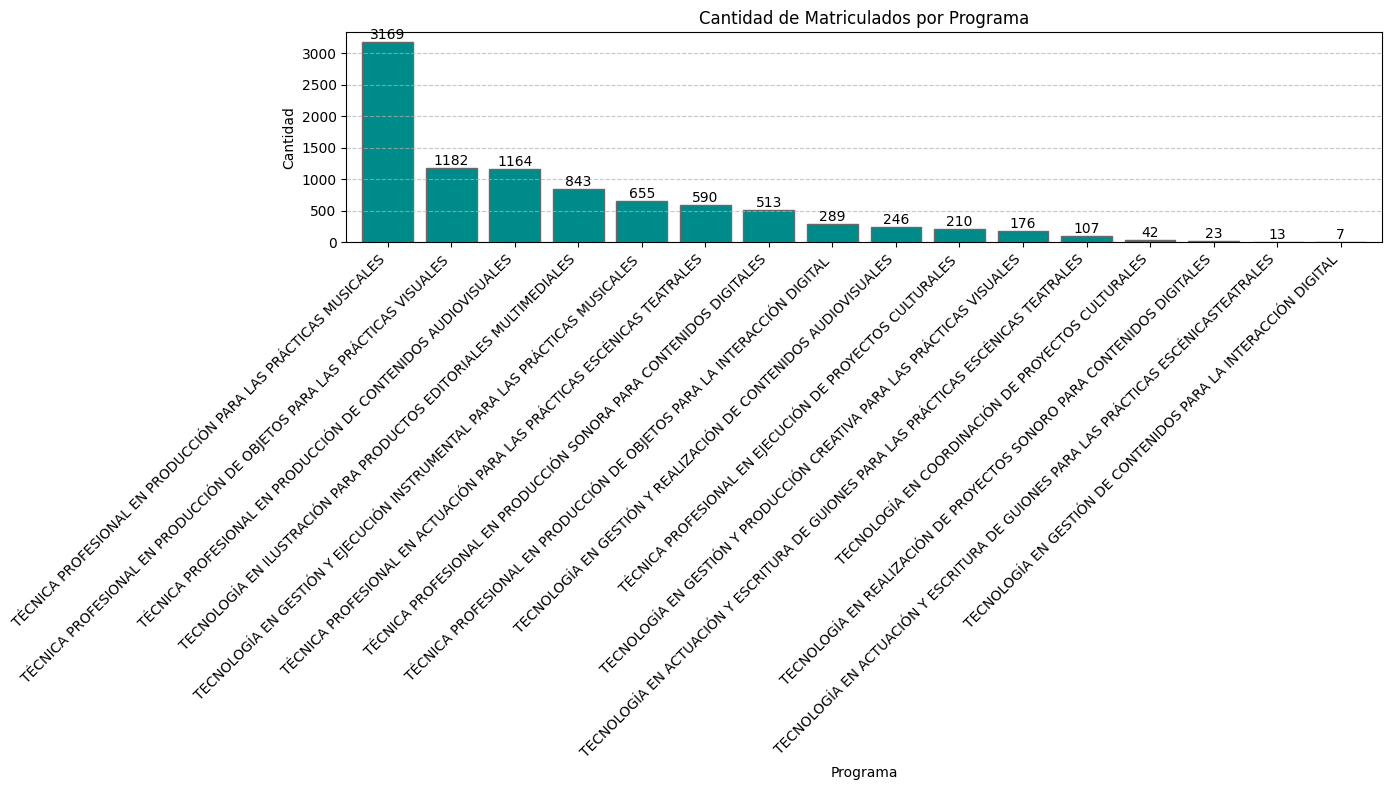

In [36]:
cantidad_programas = matriculados_db['PROGRAMA'].value_counts(ascending=False)
plt.figure(figsize=(14, 8))
ax = cantidad_programas.plot(kind='bar', color='darkcyan', edgecolor='dimgray', width=0.8)
for index, value in enumerate(cantidad_programas):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.title('Cantidad de Matriculados por Programa')
plt.xlabel('Programa')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Conclusiones:
- El Programa con mayor cantidad de matriculados es TÉCNICA PROFESIONAL EN PRODUCCIÓN PARA LAS PRÁCTICAS MUSICALES con 3169 de matriculados. Esto sugiere que estos programas son los más populares o demandados entre los estudiantes
- El Programa con menor cantidad de matriculados: TECNOLOGÍA EN GESTIÓN DE CONTENIDOS PARA LA INTERACCIÓN DIGITAL con 7 matriculados. Este programa podría ser menos conocido, menos atractivo o tener requisitos específicos que limitan la cantidad de estudiantes que pueden inscribirse.
- En segundo y tercer lugar tenemos los programas TÉCNICA PROFESIONAL EN PRODUCCIÓN DE OBJETOS PARA LAS PRÁCTICAS VISUALES con 1182 matriculados y TÉCNICA PROFESIONAL EN PRODUCCIÓN DE CONTENIDOS AUDIOVISUALES con 1164 con un registro de matriculas muy parejas siendo la diferencia muy poca.
- La distribución de los programas varía significativamente. Una distribución muy desequilibrada podría indicar una concentración de recursos y atención en ciertos programas, mientras que otros podrían necesitar más promoción o apoyo.

### Distribución de matriculados por año


Agrupa los datos por año y cuenta el número de matriculados en cada año:

In [37]:
matriculados_por_anio = matriculados_db.groupby('ANIO_MATRICULA').size()

In [38]:
matriculados_por_anio

,0
ANIO_MATRICULA,
2019,606
2020,1410
2021,1730
2022,1988
2023,2256
2024,1239


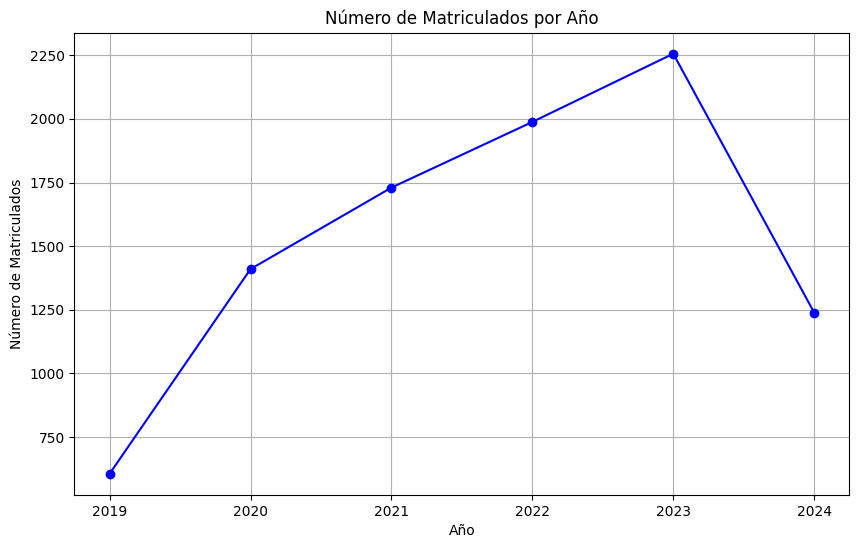

In [39]:
matriculados_por_anio = matriculados_db.groupby('ANIO_MATRICULA').size()
plt.figure(figsize=(10, 6))
plt.plot(matriculados_por_anio.index, matriculados_por_anio.values, marker='o', linestyle='-', color='b')
plt.title('Número de Matriculados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Matriculados')
plt.grid(True)
plt.show()

### Conclusiones
- En el año 2019 fue la apertura de la nueva sede en Copacabana la cúal llevó la firma de convenios con la alcaldía de la misma para la profesionalización de artistas; y para asegurar el crecimiento acádemico y administrativo de la institución incrementaron tarifas de los derechos pecuniarios de la institución los cuales deben ser pagados por los aspirantes a los programas que ofrece la institución.
- A partir del año 2020 hasta el 2023 se logra ver un crecimiento continuo, esto puede sugerir una mayor oferta académica diversa.
- El Tecnológico de Artes Débora Arango celebró la graduación de 128 estudiantes de 15 programas de educación superior en el primer semestre de 2023, además fue participe en varios eventos como el VII Seminario Internacional de Investigación en prácticas artísticas. También se unió con entusiasmo a la celebración del día Internacional del Teatro 2023. Además se llevó a cabo el Festival de nuevos talentos 2023-1.
- La cantidad de matriculas del año 2024 sólo está reflejada hasta el primer semestre del año ya que es el año en curso.

### Gráfica Cantidad de Género

Contar el número de matriculados por sexo

In [40]:
matriculados_por_sexo = matriculados_db['ID_SEXO'].value_counts()

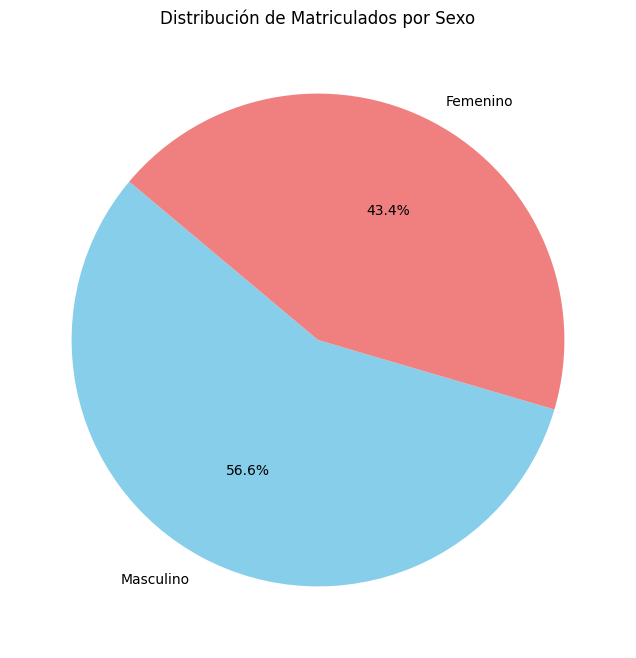

In [41]:
matriculados_por_sexo = matriculados_db['ID_SEXO'].value_counts()
plt.figure(figsize=(8, 8))
matriculados_por_sexo.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Distribución de Matriculados por Sexo')
plt.ylabel('')
plt.show()

### Conclusión
- Hay equilibrio cercano al 50/50 lo que sugiere que la institución ha logrado atraer a ambos géneros por igual

### Gráfica Tendencia de País de Nacimiento

Agrupa los datos por el código del país de nacimiento y cuenta el número de matriculados en cada país::

In [42]:
matriculados_por_pais_nacimiento = matriculados_db.groupby('PAISNACIMIENTO').size()

In [43]:
matriculados_por_pais_nacimiento

,0
PAISNACIMIENTO,
32,5
87,4
170,9050
188,6
196,2
218,6
604,9
724,5
826,7


Crear diccionario con los códigos de los países que aparecen en el dataset, reemplazando los códigos para una mejor visualización.

In [44]:
codigos_paises = {
    170: 'Colombia',
    862: 'Venezuela',
    840: 'Estados Unidos',
    850: 'Islas Vírgenes de E.U',
    604: 'Perú',
    826: 'Reino Unido',
    188: 'Costa Rica',
    218: 'Ecuador',
    32: 'Argentina',
    724: 'España',
    87: 'Paises Bajos',
    196: 'Chipre',
}
matriculados_db['PAISNACIMIENTO'] = matriculados_db['PAISNACIMIENTO'].map(codigos_paises)

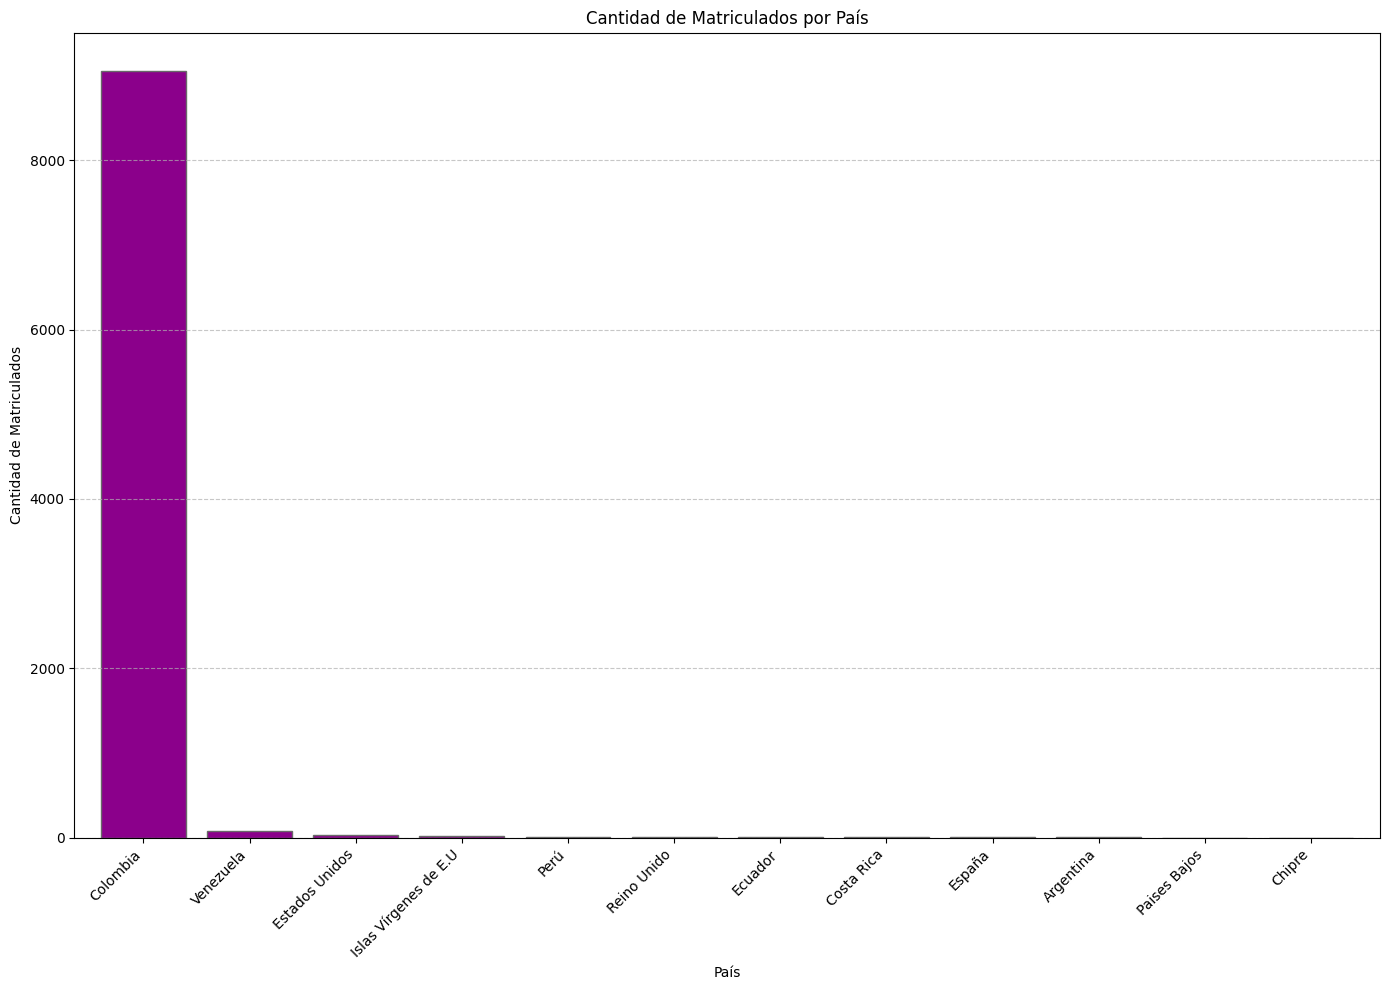

In [45]:
matriculados_por_pais_nacimiento = matriculados_db['PAISNACIMIENTO'].value_counts(ascending=False)
plt.figure(figsize=(14, 10))
matriculados_por_pais_nacimiento.plot(kind='bar', color='darkmagenta', edgecolor='dimgray', width=0.8)
plt.title('Cantidad de Matriculados por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Matriculados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Conclusiones:

- La presencia de estudiantes matriculados en el Tecnológico de Artes Débora Arango provenientes de Venezuela es baja debido a una combinación de factores que limitan su acceso a la educación en Colombia. A pesar de la crisis política y económica en Venezuela, la proximidad geográfica, la similitud cultural, las oportunidades educativas, los costos educativos asequibles, las facilidades para migrantes y las redes de apoyo, los estudiantes venezolanos enfrentan desafíos como limitaciones económicas, trámites administrativos complejos, falta de información, competencia con otras instituciones, situaciones migratorias precarias y prioridades personales que dificultan su matriculación. Esto sugiere que, aunque existen oportunidades para los estudiantes venezolanos, es necesario abordar estos obstáculos para aumentar su participación y brindarles acceso a la educación en el Tecnológico de Artes Débora Arango.
- La presencia de estudiantes matriculados en el Tecnológico de Artes Débora Arango provenientes de Estados Unidos se debe a una combinación de factores que hacen de esta institución una opción atractiva para ellos. La institución ofrece programas de intercambio cultural, oportunidades de estudio en el exterior, programas de estudio en español, costos educativos competitivos, diversidad cultural, reconocimiento internacional y facilidades para estudiantes internacionales. Todo esto permite a estudiantes estadounidenses aprovechar la experiencia educativa en Colombia, enriquecer sus habilidades lingüísticas y culturales, y acceder a una educación de calidad a un costo razonable, lo que facilita su éxito académico y personal.

### Histograma para visualizar la distribución de edades

Convertir la columna ANIO_NACIMIENTO al tipo de dato datetime:

In [46]:
matriculados_db['ANIO_NACIMIENTO'] = pd.to_datetime(matriculados_db['ANIO_NACIMIENTO'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [47]:
from datetime import datetime

current_year = datetime.now().year
matriculados_db['EDAD'] = current_year - matriculados_db['ANIO_NACIMIENTO'].dt.year

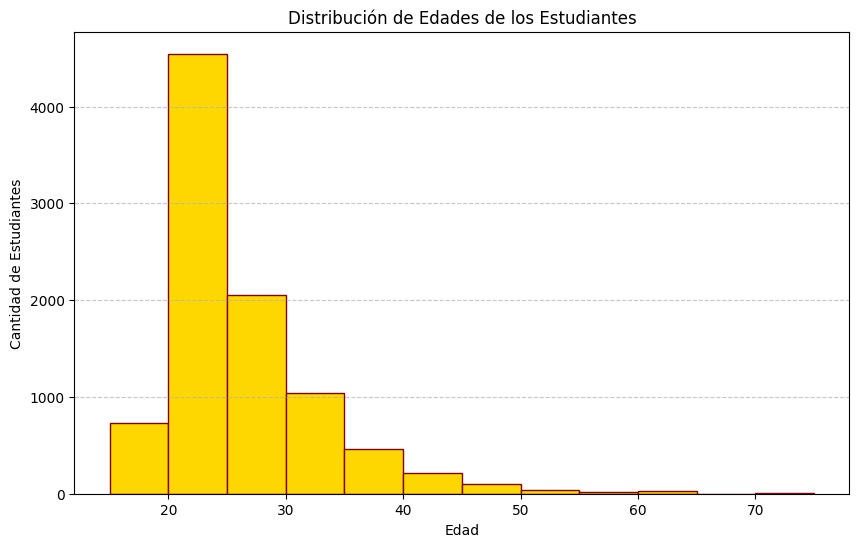

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(matriculados_db['EDAD'].dropna(), bins=range(15, 80, 5), color='gold', edgecolor='maroon')
plt.title('Distribución de Edades de los Estudiantes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Estudiantes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Conclusiones:

- La baja presencia de estudiantes entre los 40 años en adelante en el Tecnológico de Artes Débora Arango se debe a una combinación de factores que limitan su participación en la educación. Estos incluyen cambios en la etapa laboral, responsabilidades familiares, prioridades personales, limitaciones en el acceso a la educación previa, percepciones sobre la educación, falta de flexibilidad en los programas educativos, motivaciones y objetivos diferentes, falta de información, posibles discriminaciones por edad y situaciones económicas desfavorables. Estos factores convergen para hacer que la educación sea menos accesible o atractiva para personas en esta etapa de la vida, lo que resulta en una baja representación en la institución. Para aumentar la participación de este grupo, es importante abordar estas barreras y adaptar los programas educativos para satisfacer sus necesidades y circunstancias únicas.